<a href="https://colab.research.google.com/github/iyngaran/skin-disease-detection-using-machine-learning-algorithms/blob/master/Model_improvements_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download images of lesion diagnosis
import zipfile

!wget  https://testing.idev55.com/lesion-diagnosis-images.zip

# Unzip the downloaded file
zip_file = zipfile.ZipFile("lesion-diagnosis-images.zip", "r")
zip_file.extractall()
zip_file.close()

--2022-09-26 13:23:29--  https://testing.idev55.com/lesion-diagnosis-images.zip
Resolving testing.idev55.com (testing.idev55.com)... 3.84.41.34
Connecting to testing.idev55.com (testing.idev55.com)|3.84.41.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2529414732 (2.4G) [application/zip]
Saving to: ‘lesion-diagnosis-images.zip’

lesion-diagnosis-im 100%[===================>]   2.36G   237MB/s    in 9.7s    

2022-09-26 13:23:39 (248 MB/s) - ‘lesion-diagnosis-images.zip’ saved [2529414732/2529414732]



In [ ]:
!mv 'Lesion diagnosis' lesion-diagnosis

In [ ]:
!ls

lesion-diagnosis  lesion-diagnosis-images.zip  __MACOSX  sample_data


In [ ]:
!ls lesion-diagnosis

images


In [ ]:
!ls lesion-diagnosis/images

all-images  test  train


In [ ]:
!ls lesion-diagnosis/images/train

'actinic keratosis'	 melanoma  'pigmented benign keratosis'
'basal cell carcinoma'	 nevus	   'seborrheic keratosis'


In [ ]:
!mv lesion-diagnosis/images/train/'actinic keratosis' lesion-diagnosis/images/train/actinic-keratosis
!mv lesion-diagnosis/images/train/'pigmented benign keratosis' lesion-diagnosis/images/train/pigmented-benign-keratosis
!mv lesion-diagnosis/images/train/'basal cell carcinoma' lesion-diagnosis/images/train/basal-cell-carcinoma
!mv lesion-diagnosis/images/train/'seborrheic keratosis' lesion-diagnosis/images/train/seborrheic-keratosis

!mv lesion-diagnosis/images/test/'actinic keratosis' lesion-diagnosis/images/test/actinic-keratosis
!mv lesion-diagnosis/images/test/'pigmented benign keratosis' lesion-diagnosis/images/test/pigmented-benign-keratosis
!mv lesion-diagnosis/images/test/'basal cell carcinoma' lesion-diagnosis/images/test/basal-cell-carcinoma
!mv lesion-diagnosis/images/test/'seborrheic keratosis' lesion-diagnosis/images/test/seborrheic-keratosis

In [ ]:
!ls lesion-diagnosis/images/train

actinic-keratosis     melanoma	pigmented-benign-keratosis
basal-cell-carcinoma  nevus	seborrheic-keratosis


In [ ]:
!ls lesion-diagnosis/images/test

actinic-keratosis     melanoma	pigmented-benign-keratosis
basal-cell-carcinoma  nevus	seborrheic-keratosis


In [ ]:
!ls lesion-diagnosis/images/train/actinic-keratosis

ISIC_0032404.JPG  ISIC_0058640.JPG  ISIC_0063883.JPG  ISIC_0069195.JPG
ISIC_0032422.JPG  ISIC_0058653.JPG  ISIC_0063890.JPG  ISIC_0069211.JPG
ISIC_0032437.JPG  ISIC_0058756.JPG  ISIC_0063927.JPG  ISIC_0069265.JPG
ISIC_0032854.JPG  ISIC_0058762.JPG  ISIC_0063956.JPG  ISIC_0069269.JPG
ISIC_0033151.JPG  ISIC_0058769.JPG  ISIC_0064022.JPG  ISIC_0069282.JPG
ISIC_0033358.JPG  ISIC_0058776.JPG  ISIC_0064063.JPG  ISIC_0069283.JPG
ISIC_0033413.JPG  ISIC_0058864.JPG  ISIC_0064067.JPG  ISIC_0069289.JPG
ISIC_0033456.JPG  ISIC_0058884.JPG  ISIC_0064151.JPG  ISIC_0069352.JPG
ISIC_0033494.JPG  ISIC_0058890.JPG  ISIC_0064196.JPG  ISIC_0069384.JPG
ISIC_0033705.JPG  ISIC_0058902.JPG  ISIC_0064211.JPG  ISIC_0069460.JPG
ISIC_0033811.JPG  ISIC_0058924.JPG  ISIC_0064222.JPG  ISIC_0069483.JPG
ISIC_0033866.JPG  ISIC_0058939.JPG  ISIC_0064231.JPG  ISIC_0069518.JPG
ISIC_0053478.JPG  ISIC_0058940.JPG  ISIC_0064262.JPG  ISIC_0069532.JPG
ISIC_0053506.JPG  ISIC_0058951.JPG  ISIC_0064322.JPG  ISIC_0069544.JPG
ISIC_0

In [ ]:
!rm -f lesion-diagnosis/images/train/actinic-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/train/melanoma/metadata.csv
!rm -f lesion-diagnosis/images/train/pigmented-benign-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/train/basal-cell-carcinoma/metadata.csv
!rm -f lesion-diagnosis/images/train/nevus/metadata.csv
!rm -f lesion-diagnosis/images/train/seborrheic-keratosis/metadata.csv

!rm -f lesion-diagnosis/images/test/actinic-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/test/melanoma/metadata.csv
!rm -f lesion-diagnosis/images/test/pigmented-benign-keratosis/metadata.csv
!rm -f lesion-diagnosis/images/test/basal-cell-carcinoma/metadata.csv
!rm -f lesion-diagnosis/images/test/nevus/metadata.csv
!rm -f lesion-diagnosis/images/test/seborrheic-keratosis/metadata.csv

In [ ]:
!ls -a lesion-diagnosis/images/train/actinic-keratosis/

.		  ISIC_0058623.JPG  ISIC_0063878.JPG  ISIC_0069195.JPG
..		  ISIC_0058639.JPG  ISIC_0063883.JPG  ISIC_0069211.JPG
.DS_Store	  ISIC_0058640.JPG  ISIC_0063890.JPG  ISIC_0069265.JPG
ISIC_0032404.JPG  ISIC_0058653.JPG  ISIC_0063927.JPG  ISIC_0069269.JPG
ISIC_0032422.JPG  ISIC_0058756.JPG  ISIC_0063956.JPG  ISIC_0069282.JPG
ISIC_0032437.JPG  ISIC_0058762.JPG  ISIC_0064022.JPG  ISIC_0069283.JPG
ISIC_0032854.JPG  ISIC_0058769.JPG  ISIC_0064063.JPG  ISIC_0069289.JPG
ISIC_0033151.JPG  ISIC_0058776.JPG  ISIC_0064067.JPG  ISIC_0069352.JPG
ISIC_0033358.JPG  ISIC_0058864.JPG  ISIC_0064151.JPG  ISIC_0069384.JPG
ISIC_0033413.JPG  ISIC_0058884.JPG  ISIC_0064196.JPG  ISIC_0069460.JPG
ISIC_0033456.JPG  ISIC_0058890.JPG  ISIC_0064211.JPG  ISIC_0069483.JPG
ISIC_0033494.JPG  ISIC_0058902.JPG  ISIC_0064222.JPG  ISIC_0069518.JPG
ISIC_0033705.JPG  ISIC_0058924.JPG  ISIC_0064231.JPG  ISIC_0069532.JPG
ISIC_0033811.JPG  ISIC_0058939.JPG  ISIC_0064262.JPG  ISIC_0069544.JPG
ISIC_0033866.JPG  ISIC_0058940.JPG  I

In [ ]:
import os

# Walk through the lesion-diagnosis directory and remove .DS_Store file from all the folders
for dirpath in os.walk("lesion-diagnosis"):
  file_path = dirpath[0] + "/.DS_Store"
  if os.path.isfile(file_path):
    os.remove(file_path)

In [ ]:
!rm -rf lesion-diagnosis/images/all-images
!cp -R lesion-diagnosis/images lesion-diagnosis/all-images
!mv lesion-diagnosis/all-images lesion-diagnosis/all-lesion-diagnosis-images

In [ ]:
# Walk through the lesion-diagnosis directory and list number of files
for dirpath, dirnames, filenames in os.walk("lesion-diagnosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'lesion-diagnosis'.
There are 2 directories and 0 images in 'lesion-diagnosis/images'.
There are 6 directories and 0 images in 'lesion-diagnosis/images/train'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/basal-cell-carcinoma'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/pigmented-benign-keratosis'.
There are 0 directories and 790 images in 'lesion-diagnosis/images/train/actinic-keratosis'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/melanoma'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/seborrheic-keratosis'.
There are 0 directories and 800 images in 'lesion-diagnosis/images/train/nevus'.
There are 6 directories and 0 images in 'lesion-diagnosis/images/test'.
There are 0 directories and 200 images in 'lesion-diagnosis/images/test/basal-cell-carcinoma'.
There are 0 directories and 200 images in 'lesion-diagnosis/images/test/pigmented

**we've have.**


*   800 training images and 200 testing images for melanoma,pigmented-benign-keratosis,basal-cell-carcinoma,nevus,seborrheic-keratosis
*   only for actinic-keratosis, we have 790 images for training and 120 images for testing

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np

# turn our training path into a Python path and created a list of class_names from the subdirectories
data_dir = pathlib.Path("lesion-diagnosis/images/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['actinic-keratosis' 'basal-cell-carcinoma' 'melanoma' 'nevus'
 'pigmented-benign-keratosis' 'seborrheic-keratosis']


**Visualize the images**

In [ ]:
# A resuable function to view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1936, 2592, 3)


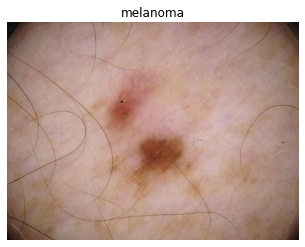

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="lesion-diagnosis/images/train/",
                        target_class="melanoma")

In [ ]:
# View the shape of the image 
img.shape # returns (width, height, colour channels)

(1936, 2592, 3)

In [ ]:
# View the img (array)
img

array([[[15, 11, 10],
        [16, 12, 11],
        [18, 14, 13],
        ...,
        [29, 24, 18],
        [27, 22, 16],
        [25, 20, 14]],

       [[16, 12, 11],
        [16, 12, 11],
        [16, 12, 11],
        ...,
        [28, 23, 17],
        [27, 22, 16],
        [26, 21, 15]],

       [[19, 15, 14],
        [18, 14, 13],
        [17, 13, 12],
        ...,
        [27, 22, 16],
        [27, 22, 16],
        [26, 21, 15]],

       ...,

       [[18, 19, 14],
        [16, 17, 12],
        [13, 14,  9],
        ...,
        [24, 19, 15],
        [24, 19, 15],
        [23, 18, 14]],

       [[17, 18, 13],
        [15, 16, 11],
        [12, 13,  8],
        ...,
        [24, 19, 15],
        [25, 20, 16],
        [27, 22, 18]],

       [[17, 18, 13],
        [15, 16, 11],
        [12, 13,  8],
        ...,
        [19, 14, 10],
        [22, 17, 13],
        [25, 20, 16]]], dtype=uint8)

In [ ]:
# convert the img to tensors
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(1936, 2592, 3), dtype=uint8, numpy=
array([[[15, 11, 10],
        [16, 12, 11],
        [18, 14, 13],
        ...,
        [29, 24, 18],
        [27, 22, 16],
        [25, 20, 14]],

       [[16, 12, 11],
        [16, 12, 11],
        [16, 12, 11],
        ...,
        [28, 23, 17],
        [27, 22, 16],
        [26, 21, 15]],

       [[19, 15, 14],
        [18, 14, 13],
        [17, 13, 12],
        ...,
        [27, 22, 16],
        [27, 22, 16],
        [26, 21, 15]],

       ...,

       [[18, 19, 14],
        [16, 17, 12],
        [13, 14,  9],
        ...,
        [24, 19, 15],
        [24, 19, 15],
        [23, 18, 14]],

       [[17, 18, 13],
        [15, 16, 11],
        [12, 13,  8],
        ...,
        [24, 19, 15],
        [25, 20, 16],
        [27, 22, 18]],

       [[17, 18, 13],
        [15, 16, 11],
        [12, 13,  8],
        ...,
        [19, 14, 10],
        [22, 17, 13],
        [25, 20, 16]]], dtype=uint8)>

The the values in the img tensor are between 0 and 255. It is the possible range for red, green and blue values.

For an example, the first element 24, 18, 18 gives the image.png


**We should normalize the values before pass them to ML algorithms as normalized pixel values**


In [ ]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.05882353, 0.04313725, 0.03921569],
        [0.0627451 , 0.04705882, 0.04313725],
        [0.07058824, 0.05490196, 0.05098039],
        ...,
        [0.11372549, 0.09411765, 0.07058824],
        [0.10588235, 0.08627451, 0.0627451 ],
        [0.09803922, 0.07843137, 0.05490196]],

       [[0.0627451 , 0.04705882, 0.04313725],
        [0.0627451 , 0.04705882, 0.04313725],
        [0.0627451 , 0.04705882, 0.04313725],
        ...,
        [0.10980392, 0.09019608, 0.06666667],
        [0.10588235, 0.08627451, 0.0627451 ],
        [0.10196078, 0.08235294, 0.05882353]],

       [[0.0745098 , 0.05882353, 0.05490196],
        [0.07058824, 0.05490196, 0.05098039],
        [0.06666667, 0.05098039, 0.04705882],
        ...,
        [0.10588235, 0.08627451, 0.0627451 ],
        [0.10588235, 0.08627451, 0.0627451 ],
        [0.10196078, 0.08235294, 0.05882353]],

       ...,

       [[0.07058824, 0.0745098 , 0.05490196],
        [0.0627451 , 0.06666667, 0.04705882],
        [0.05098039, 0

# Building a convolutional neural network



*   Load all the images
*   Preprocess / normalize the images
*   Build a CNN to find patterns in the images
*   Compile our CNN
*   Fit the CNN to our training data



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0)
train_data_generator = ImageDataGenerator(rescale=1./255) # Generates batches of tensor image data with real-time data augmentation
valid_data_generator = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "lesion-diagnosis/images/train/"
test_dir = "lesion-diagnosis/images/test/"

# Import data from directories and turn it into batches
# It will create the data and lables automatically for us
train_data = train_data_generator.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # we're working on binary data
                                               seed=42)

valid_data = valid_data_generator.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 4790 images belonging to 6 classes.
Found 1120 images belonging to 6 classes.


In [ ]:
train_data, valid_data

(<keras.preprocessing.image.DirectoryIterator at 0x7f739019a210>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f7399b5d490>)

# Build a model without CNN

In [ ]:
# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
150/150 [==============================] - 235s 2s/step - loss: 1.5776 - accuracy: 0.1674 - val_loss: 0.0500 - val_accuracy: 0.1786
Epoch 2/5
150/150 [==============================] - 245s 2s/step - loss: -0.2638 - accuracy: 0.1670 - val_loss: -0.7863 - val_accuracy: 0.1786
Epoch 3/5
150/150 [==============================] - 230s 2s/step - loss: -1.0997 - accuracy: 0.1670 - val_loss: -1.7810 - val_accuracy: 0.1786
Epoch 4/5
150/150 [==============================] - 228s 2s/step - loss: -2.0756 - accuracy: 0.1670 - val_loss: -2.9284 - val_accuracy: 0.1786
Epoch 5/5
150/150 [==============================] - 228s 2s/step - loss: -3.1865 - accuracy: 0.1670 - val_loss: -4.2335 - val_accuracy: 0.1786


# Compile the model & Fit

In [ ]:
# Check out the layers in our model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________
